In [316]:
import pandas as pd
import csv
import datetime
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy
import math

In [203]:
def line_plot_s(line1, label1, title):
    fig, ax = plt.subplots(1, figsize=(16, 9))
    ax.plot(line1, label=label1, linewidth=2)
    ax.set_title(title, fontsize=18)
    ax.legend(loc='best', fontsize=18)

In [204]:
def line_plot(line1, line2, label1=None, label2=None, title=''):
    fig, ax = plt.subplots(1, figsize=(16, 9))
    ax.plot(line1, label=label1, linewidth=2)
    ax.plot(line2, label=label2, linewidth=2)
    ax.set_title(title, fontsize=18)
    ax.legend(loc='best', fontsize=18)

In [205]:
def normalise_one_base(df):
    """ Normalise dataframe column-wise to reflect changes with
        respect to first entry.
    """
    df_tmp = df.copy()
    
    return df_tmp / df_tmp.iloc[0]

In [206]:
def loglise(df):
    df_tmp = df.copy()
    df_tmp["Value"] = np.log(df_tmp['Value'])
    return df_tmp

In [207]:
def Ddata_to_Mdata(df):
    df_tmp = df.copy()
    df_tmp = df_tmp.set_index('Date')#, inplace=True)
    df_tmp = df_tmp.loc[df_tmp.groupby(df_tmp.index.to_period('M')).apply(lambda x: x.index.max())]
    return df_tmp

In [208]:
def data_arrangement(df):
    df_tmp = df.copy()
    df_tmp = Ddata_to_Mdata(df_tmp)
    df_tmp = normalise_one_base(df_tmp)
    return df_tmp

In [209]:
def get_max_date(df_name,df,output_list):
    tmp_list = list()
    tmp = df['Value'].nlargest(2).reset_index()
    tmp_list=[df_name, tmp.iloc[0].Date, tmp.iloc[0].Value*100, tmp.iloc[1].Date, tmp.iloc[1].Value*100]
    output_list.append(tmp_list)

In [210]:
def get_min_date(df_name,df,output_list):
    tmp_list = list()
    tmp = df['Value'].nsmallest(2).reset_index()
    tmp_list=[df_name, tmp.iloc[0].Date, tmp.iloc[0].Value*100, tmp.iloc[1].Date, tmp.iloc[1].Value*100]
    output_list.append(tmp_list)

In [211]:
def gmean(df):
    return (scipy.stats.gmean(df.applymap(lambda x: x + 1).dropna())[0]-1)*100

In [298]:
def cnt_std_distributed( name, df_name, df, df_std ):
    
    cnt_list = [ name, 0, 0, 0, 0, 0, 0 ]
    
    for pct in df.Value.dropna():
        if pct > (df_std.loc[df_name][0])*5 or pct < (df_std.loc[df_name][0])*(-5):
            cnt_list[6] = cnt_list[6] + 1
        elif pct > (df_std.loc[df_name][0])*4 or pct < (df_std.loc[df_name][0])*(-4):
            cnt_list[5] = cnt_list[5] + 1
        elif pct > (df_std.loc[df_name][0])*3 or pct < (df_std.loc[df_name][0])*(-3):
            cnt_list[4] = cnt_list[4] + 1
        elif pct > (df_std.loc[df_name][0])*2 or pct < (df_std.loc[df_name][0])*(-2):
            cnt_list[3] = cnt_list[3] + 1
        elif pct > (df_std.loc[df_name][0])*1 or pct < (df_std.loc[df_name][0])*(-1):
            cnt_list[2] = cnt_list[2] + 1
        elif pct <= (df_std.loc[df_name][0])*1 and pct >= (df_std.loc[df_name][0])*(-1):
            cnt_list[1] = cnt_list[1] + 1    
        else:
            print("Error! pct:"+str(pct)+"  std:"+str(df_std_list.loc[df_name][0]))
            
        total = cnt_list[1]+cnt_list[2]+cnt_list[3]+cnt_list[4]+cnt_list[5]+cnt_list[6]
        rtn_list = [ name, round(cnt_list[1]*100/total,2), round(cnt_list[2]*100/total,2), round(cnt_list[3]*100/total,2), round(cnt_list[4]*100/total,2), round(cnt_list[5]*100/total,2), round(cnt_list[6]*100/total,2) ]
            
    return rtn_list
        

In [325]:
def get_2_period_means(df_name, df):
    tmp_list = list()
    half = math.floor(len(df.Value)/2)
    df_front = df[:half].copy()
    df_end = df[half:].copy()
    tmp_list=[df_name, gmean(df_front), gmean(df_end)]
    return tmp_list

In [336]:
def round_df(df):
    df_tmp = df.copy()
    df_tmp["Value"] = round(df_tmp['Value'],1)
    return df_tmp

In [213]:
pd.set_option('float_format', '{:f}'.format)

In [214]:
df_10YUSAB = pd.read_csv("10YUSAB.csv")
df_AUD = pd.read_csv("AUD.csv")
df_FED = pd.read_csv("FED.csv")
df_SHA = pd.read_csv("SHA000001.csv")
df_HSI = pd.read_csv("HSI.csv")
df_IXIC= pd.read_csv("IXIC.csv")
df_JPY = pd.read_csv("JPY.csv")
df_NI225 = pd.read_csv("NI225.csv")
df_OIL = pd.read_csv("OILPRICE.csv")
df_POrate = pd.read_csv("POSTOFFICERATE.csv")
df_TAIEX = pd.read_csv("TAIEX.csv")
df_USACPI = pd.read_csv("USACPI.csv")
df_USD = pd.read_csv("USD.csv")
df_GOLD = pd.read_csv("GOLD.csv")
#2070晶華
df_2070 = pd.read_csv("2070.csv")
#2748雲品
df_2748 = pd.read_csv("2748.csv")
#2884玉山金
df_2884 = pd.read_csv("2884.csv")
#2891中信金
df_2891 = pd.read_csv("2891.csv")
#4205中華食
df_4205 = pd.read_csv("4205.csv")

In [215]:
df_10YUSAB['DATE'] = pd.to_datetime(df_10YUSAB['DATE'])
#df_10YUSAB.dropna(axis=0,how='any')
#df_10YUSAB[ ~ df_10YUSAB['DGS10'].str.contains('') ]
df_10YUSAB = df_10YUSAB[(True^df_10YUSAB['DGS10'].isin(["."]))]
df_10YUSAB['DGS10'] = pd.to_numeric(df_10YUSAB['DGS10'])
df_10YUSAB.columns = ['Date', 'Value']

In [216]:
df_AUD.drop('紐約市場匯率', axis=1, inplace=True)
df_AUD.drop('台幣兌原幣 (原幣)', axis=1, inplace=True)
df_AUD.drop('漲跌', axis=1, inplace=True)
df_AUD.drop('原幣兌美元 (美元)', axis=1, inplace=True)
df_AUD.columns = ['Date', 'Value']
df_AUD['Date'] = pd.to_datetime(df_AUD['Date'])
df_AUD['Value'] = pd.to_numeric(df_AUD['Value'])
#df_AUD = df_AUD.rename(columns={'日期': 'DATE', '原幣兌台幣 (台幣)': 'VALUE'})

In [217]:
df_FED.columns = ['Date', 'Value']
df_FED['Date'] = pd.to_datetime(df_FED['Date'])
df_FED['Value'] = pd.to_numeric(df_FED['Value'])

In [218]:
df_GOLD.columns = ['Date', 'Value']
df_GOLD['Date'] = pd.to_datetime(df_GOLD['Date'])
df_GOLD['Value'] = pd.to_numeric(df_GOLD['Value'])

In [219]:
df_SHA.drop("漲跌", axis=1, inplace=True)
df_SHA.drop("漲跌幅%", axis=1, inplace=True)
df_SHA.drop("週漲跌幅 %", axis=1, inplace=True)
df_SHA.drop("月漲跌幅 %", axis=1, inplace=True)
df_SHA.drop("季漲跌幅 %", axis=1, inplace=True)
df_SHA.drop("半年漲跌幅 %", axis=1, inplace=True)
df_SHA.drop("年漲跌幅 %", axis=1, inplace=True)
df_SHA.drop("本週以來漲跌幅 %", axis=1, inplace=True)
df_SHA.drop("本月以來漲跌幅 %", axis=1, inplace=True)
df_SHA.drop("本季以來漲跌幅 %", axis=1, inplace=True)
df_SHA.drop("半年以來漲跌幅 %", axis=1, inplace=True)
df_SHA.drop("本年以來漲跌幅 %", axis=1, inplace=True)
df_SHA.columns = ['Date', 'Value']
df_SHA['Date'] = pd.to_datetime(df_SHA['Date'])
df_SHA['Value'] = pd.to_numeric(df_SHA['Value'].str.replace(",", ""))

In [220]:
df_NI225.drop("漲跌", axis=1, inplace=True)
df_NI225.drop("漲跌幅%", axis=1, inplace=True)
df_NI225.drop("週漲跌幅 %", axis=1, inplace=True)
df_NI225.drop("月漲跌幅 %", axis=1, inplace=True)
df_NI225.drop("季漲跌幅 %", axis=1, inplace=True)
df_NI225.drop("半年漲跌幅 %", axis=1, inplace=True)
df_NI225.drop("年漲跌幅 %", axis=1, inplace=True)
df_NI225.drop("本週以來漲跌幅 %", axis=1, inplace=True)
df_NI225.drop("本月以來漲跌幅 %", axis=1, inplace=True)
df_NI225.drop("本季以來漲跌幅 %", axis=1, inplace=True)
df_NI225.drop("半年以來漲跌幅 %", axis=1, inplace=True)
df_NI225.drop("本年以來漲跌幅 %", axis=1, inplace=True)
df_NI225.columns = ['Date', 'Value']
df_NI225['Date'] = pd.to_datetime(df_NI225['Date'])
df_NI225['Value'] = pd.to_numeric(df_NI225['Value'].str.replace(",", ""))

In [221]:
df_HSI.drop("漲跌", axis=1, inplace=True)
df_HSI.drop("漲跌幅%", axis=1, inplace=True)
df_HSI.drop("週漲跌幅 %", axis=1, inplace=True)
df_HSI.drop("月漲跌幅 %", axis=1, inplace=True)
df_HSI.drop("季漲跌幅 %", axis=1, inplace=True)
df_HSI.drop("半年漲跌幅 %", axis=1, inplace=True)
df_HSI.drop("年漲跌幅 %", axis=1, inplace=True)
df_HSI.drop("本週以來漲跌幅 %", axis=1, inplace=True)
df_HSI.drop("本月以來漲跌幅 %", axis=1, inplace=True)
df_HSI.drop("本季以來漲跌幅 %", axis=1, inplace=True)
df_HSI.drop("半年以來漲跌幅 %", axis=1, inplace=True)
df_HSI.drop("本年以來漲跌幅 %", axis=1, inplace=True)
df_HSI.columns = ['Date', 'Value']
df_HSI['Date'] = pd.to_datetime(df_HSI['Date'])
df_HSI['Value'] = pd.to_numeric(df_HSI['Value'].str.replace(",", ""))

In [222]:
df_IXIC.drop("漲跌", axis=1, inplace=True)
df_IXIC.drop("漲跌幅%", axis=1, inplace=True)
df_IXIC.drop("週漲跌幅 %", axis=1, inplace=True)
df_IXIC.drop("月漲跌幅 %", axis=1, inplace=True)
df_IXIC.drop("季漲跌幅 %", axis=1, inplace=True)
df_IXIC.drop("半年漲跌幅 %", axis=1, inplace=True)
df_IXIC.drop("年漲跌幅 %", axis=1, inplace=True)
df_IXIC.drop("本週以來漲跌幅 %", axis=1, inplace=True)
df_IXIC.drop("本月以來漲跌幅 %", axis=1, inplace=True)
df_IXIC.drop("本季以來漲跌幅 %", axis=1, inplace=True)
df_IXIC.drop("半年以來漲跌幅 %", axis=1, inplace=True)
df_IXIC.drop("本年以來漲跌幅 %", axis=1, inplace=True)
df_IXIC.columns = ['Date', 'Value']
df_IXIC['Date'] = pd.to_datetime(df_IXIC['Date'])
df_IXIC['Value'] = pd.to_numeric(df_IXIC['Value'].str.replace(",", ""))

In [223]:
df_JPY.drop('紐約市場匯率', axis=1, inplace=True)
df_JPY.drop('台幣兌原幣 (原幣)', axis=1, inplace=True)
df_JPY.drop('漲跌', axis=1, inplace=True)
df_JPY.drop('原幣兌美元 (美元)', axis=1, inplace=True)
df_JPY.columns = ['Date', 'Value']
df_JPY['Date'] = pd.to_datetime(df_JPY['Date'])
df_JPY['Value'] = pd.to_numeric(df_JPY['Value'])

In [224]:
#布蘭特(美元/桶)
df_OIL.drop('西德州(美元/桶)', axis=1, inplace=True)
df_OIL.drop('杜拜(美元/桶)', axis=1, inplace=True)
df_OIL.columns = ['Date', 'Value']
df_OIL['Date'] = pd.to_datetime(df_OIL['Date'])
df_OIL['Value'] = pd.to_numeric(df_OIL['Value'])
df_OIL = df_OIL.loc[df_OIL["Date"] >= datetime.datetime.strptime('01-01-07', '%d-%m-%y')]

In [225]:
#郵局3個月定存利率
df_POrate.drop('基本放款利率', axis=1, inplace=True)
df_POrate.drop('活儲', axis=1, inplace=True)
df_POrate.drop('一月定存', axis=1, inplace=True)
df_POrate.drop('六月定存', axis=1, inplace=True)
df_POrate.drop('九月定存', axis=1, inplace=True)
df_POrate.drop('一年定存', axis=1, inplace=True)
df_POrate.drop('美元活存', axis=1, inplace=True)
df_POrate.drop('美元一月定存', axis=1, inplace=True)
df_POrate.drop('美元三月定存', axis=1, inplace=True)
df_POrate.drop('美元六月定存', axis=1, inplace=True)
df_POrate.drop('美元九月定存', axis=1, inplace=True)
df_POrate.drop('美元一年定存', axis=1, inplace=True)
df_POrate.drop('港幣活存', axis=1, inplace=True)
df_POrate.drop('港幣一月定存', axis=1, inplace=True)
df_POrate.drop('港幣三月定存', axis=1, inplace=True)
df_POrate.drop('港幣六月定存', axis=1, inplace=True)
df_POrate.drop('港幣九月定存', axis=1, inplace=True)
df_POrate.drop('港幣一年定存', axis=1, inplace=True)
df_POrate.drop('瑞士法郎活存', axis=1, inplace=True)
df_POrate.columns = ['Date', 'Value']
df_POrate['Date'] = pd.to_datetime(df_POrate['Date'])
df_POrate['Value'] = pd.to_numeric(df_POrate['Value'])

In [226]:
df_TAIEX.drop('Open', axis=1, inplace=True)
df_TAIEX.drop('High', axis=1, inplace=True)
df_TAIEX.drop('Low', axis=1, inplace=True)
df_TAIEX.drop('Adj Close', axis=1, inplace=True)
df_TAIEX.drop('Volume', axis=1, inplace=True)
df_TAIEX.columns = ['Date', 'Value']
df_TAIEX['Date'] = pd.to_datetime(df_TAIEX['Date'])
df_TAIEX['Value'] = pd.to_numeric(df_TAIEX['Value'])

In [227]:
df_USACPI.columns = ['Date', 'Value']
df_USACPI['Date'] = pd.to_datetime(df_USACPI['Date'])
df_USACPI['Value'] = pd.to_numeric(df_USACPI['Value'])
df_USACPI = df_USACPI.loc[df_USACPI["Date"] >= datetime.datetime.strptime('01-01-07', '%d-%m-%y')]

In [228]:
df_USD.drop('原幣兌台幣 (台幣)', axis=1, inplace=True)
df_USD.drop('台幣兌原幣 (原幣)', axis=1, inplace=True)
df_USD.drop('漲跌', axis=1, inplace=True)
df_USD.drop('原幣兌美元 (美元)', axis=1, inplace=True)
df_USD.columns = ['Date', 'Value']
df_USD['Date'] = pd.to_datetime(df_USD['Date'])
df_USD['Value'] = pd.to_numeric(df_USD['Value'])

In [229]:
#2070晶華
df_2070.drop('開盤價(元)', axis=1, inplace=True)
df_2070.drop('最高價(元)', axis=1, inplace=True)
df_2070.drop('最低價(元)', axis=1, inplace=True)
df_2070.drop('成交量(千股)', axis=1, inplace=True)
df_2070.drop('成交值(千元)', axis=1, inplace=True)
df_2070.drop('報酬率％', axis=1, inplace=True)
df_2070.drop('週轉率％', axis=1, inplace=True)
df_2070.drop('流通在外股數(千股)', axis=1, inplace=True)
df_2070.drop('最後揭示買價', axis=1, inplace=True)
df_2070.drop('最後揭示賣價', axis=1, inplace=True)
df_2070.drop('報酬率-Ln', axis=1, inplace=True)
df_2070.drop('市值比重％', axis=1, inplace=True)
df_2070.drop('市值(百萬元)', axis=1, inplace=True)
df_2070.drop('成交值比重％', axis=1, inplace=True)
df_2070.drop('成交筆數(筆)', axis=1, inplace=True)
df_2070.drop('本益比-TSE', axis=1, inplace=True)
df_2070.drop('本益比-TEJ', axis=1, inplace=True)
df_2070.drop('股價淨值比-TSE', axis=1, inplace=True)
df_2070.drop('股價淨值比-TEJ', axis=1, inplace=True)
df_2070.columns = ['Date', 'Value']
df_2070['Date'] = pd.to_datetime(df_2070['Date'])
df_2070['Value'] = pd.to_numeric(df_2070['Value'])

In [230]:
#2748雲品
df_2748.drop('開盤價(元)', axis=1, inplace=True)
df_2748.drop('最高價(元)', axis=1, inplace=True)
df_2748.drop('最低價(元)', axis=1, inplace=True)
df_2748.drop('成交量(千股)', axis=1, inplace=True)
df_2748.drop('成交值(千元)', axis=1, inplace=True)
df_2748.drop('報酬率％', axis=1, inplace=True)
df_2748.drop('週轉率％', axis=1, inplace=True)
df_2748.drop('流通在外股數(千股)', axis=1, inplace=True)
df_2748.drop('最後揭示買價', axis=1, inplace=True)
df_2748.drop('最後揭示賣價', axis=1, inplace=True)
df_2748.drop('報酬率-Ln', axis=1, inplace=True)
df_2748.drop('市值比重％', axis=1, inplace=True)
df_2748.drop('市值(百萬元)', axis=1, inplace=True)
df_2748.drop('成交值比重％', axis=1, inplace=True)
df_2748.drop('成交筆數(筆)', axis=1, inplace=True)
df_2748.drop('本益比-TSE', axis=1, inplace=True)
df_2748.drop('本益比-TEJ', axis=1, inplace=True)
df_2748.drop('股價淨值比-TSE', axis=1, inplace=True)
df_2748.drop('股價淨值比-TEJ', axis=1, inplace=True)
df_2748.columns = ['Date', 'Value']
df_2748['Date'] = pd.to_datetime(df_2748['Date'])
df_2748['Value'] = pd.to_numeric(df_2748['Value'])

In [231]:
#2884玉山金
df_2884.drop('開盤價(元)', axis=1, inplace=True)
df_2884.drop('最高價(元)', axis=1, inplace=True)
df_2884.drop('最低價(元)', axis=1, inplace=True)
df_2884.drop('成交量(千股)', axis=1, inplace=True)
df_2884.drop('成交值(千元)', axis=1, inplace=True)
df_2884.drop('報酬率％', axis=1, inplace=True)
df_2884.drop('週轉率％', axis=1, inplace=True)
df_2884.drop('流通在外股數(千股)', axis=1, inplace=True)
df_2884.drop('最後揭示買價', axis=1, inplace=True)
df_2884.drop('最後揭示賣價', axis=1, inplace=True)
df_2884.drop('報酬率-Ln', axis=1, inplace=True)
df_2884.drop('市值比重％', axis=1, inplace=True)
df_2884.drop('市值(百萬元)', axis=1, inplace=True)
df_2884.drop('成交值比重％', axis=1, inplace=True)
df_2884.drop('成交筆數(筆)', axis=1, inplace=True)
df_2884.drop('本益比-TSE', axis=1, inplace=True)
df_2884.drop('本益比-TEJ', axis=1, inplace=True)
df_2884.drop('股價淨值比-TSE', axis=1, inplace=True)
df_2884.drop('股價淨值比-TEJ', axis=1, inplace=True)
df_2884.columns = ['Date', 'Value']
df_2884['Date'] = pd.to_datetime(df_2884['Date'])
df_2884['Value'] = pd.to_numeric(df_2884['Value'])

In [232]:
#2891中信金
df_2891.drop('開盤價(元)', axis=1, inplace=True)
df_2891.drop('最高價(元)', axis=1, inplace=True)
df_2891.drop('最低價(元)', axis=1, inplace=True)
df_2891.drop('成交量(千股)', axis=1, inplace=True)
df_2891.drop('成交值(千元)', axis=1, inplace=True)
df_2891.drop('報酬率％', axis=1, inplace=True)
df_2891.drop('週轉率％', axis=1, inplace=True)
df_2891.drop('流通在外股數(千股)', axis=1, inplace=True)
df_2891.drop('最後揭示買價', axis=1, inplace=True)
df_2891.drop('最後揭示賣價', axis=1, inplace=True)
df_2891.drop('報酬率-Ln', axis=1, inplace=True)
df_2891.drop('市值比重％', axis=1, inplace=True)
df_2891.drop('市值(百萬元)', axis=1, inplace=True)
df_2891.drop('成交值比重％', axis=1, inplace=True)
df_2891.drop('成交筆數(筆)', axis=1, inplace=True)
df_2891.drop('本益比-TSE', axis=1, inplace=True)
df_2891.drop('本益比-TEJ', axis=1, inplace=True)
df_2891.drop('股價淨值比-TSE', axis=1, inplace=True)
df_2891.drop('股價淨值比-TEJ', axis=1, inplace=True)
df_2891.columns = ['Date', 'Value']
df_2891['Date'] = pd.to_datetime(df_2891['Date'])
df_2891['Value'] = pd.to_numeric(df_2891['Value'])

In [233]:
#4205中華食
df_4205.drop('開盤價(元)', axis=1, inplace=True)
df_4205.drop('最高價(元)', axis=1, inplace=True)
df_4205.drop('最低價(元)', axis=1, inplace=True)
df_4205.drop('成交量(千股)', axis=1, inplace=True)
df_4205.drop('成交值(千元)', axis=1, inplace=True)
df_4205.drop('報酬率％', axis=1, inplace=True)
df_4205.drop('週轉率％', axis=1, inplace=True)
df_4205.drop('流通在外股數(千股)', axis=1, inplace=True)
df_4205.drop('最後揭示買價', axis=1, inplace=True)
df_4205.drop('最後揭示賣價', axis=1, inplace=True)
df_4205.drop('報酬率-Ln', axis=1, inplace=True)
df_4205.drop('市值比重％', axis=1, inplace=True)
df_4205.drop('市值(百萬元)', axis=1, inplace=True)
df_4205.drop('成交值比重％', axis=1, inplace=True)
df_4205.drop('成交筆數(筆)', axis=1, inplace=True)
df_4205.drop('本益比-TSE', axis=1, inplace=True)
df_4205.drop('本益比-TEJ', axis=1, inplace=True)
df_4205.drop('股價淨值比-TSE', axis=1, inplace=True)
df_4205.drop('股價淨值比-TEJ', axis=1, inplace=True)
df_4205.columns = ['Date', 'Value']
df_4205['Date'] = pd.to_datetime(df_4205['Date'])
df_4205['Value'] = pd.to_numeric(df_4205['Value'])

In [234]:
df_10YUSAB = Ddata_to_Mdata(df_10YUSAB)
df_AUD = Ddata_to_Mdata(df_AUD)
df_FED = Ddata_to_Mdata(df_FED)
df_SHA = Ddata_to_Mdata(df_SHA)
df_HSI = Ddata_to_Mdata(df_HSI)
df_IXIC = Ddata_to_Mdata(df_IXIC)
df_JPY = Ddata_to_Mdata(df_JPY)
df_NI225 = Ddata_to_Mdata(df_NI225)
df_OIL = Ddata_to_Mdata(df_OIL)
df_POrate = Ddata_to_Mdata(df_POrate)
df_TAIEX = Ddata_to_Mdata(df_TAIEX)
df_USACPI = Ddata_to_Mdata(df_USACPI)
df_USD = Ddata_to_Mdata(df_USD)
df_GOLD = Ddata_to_Mdata(df_GOLD)
df_2070 = Ddata_to_Mdata(df_2070)
df_2748 = Ddata_to_Mdata(df_2748)
df_2884 = Ddata_to_Mdata(df_2884)
df_2891 = Ddata_to_Mdata(df_2891)
df_4205 = Ddata_to_Mdata(df_4205)

In [257]:
df_10YUSAB_log = loglise(df_10YUSAB)
df_AUD_log = loglise(df_AUD)
df_FED_log = loglise(df_FED)
df_SHA_log = loglise(df_SHA)
df_HSI_log = loglise(df_HSI)
df_IXIC_log = loglise(df_IXIC)
df_JPY_log = loglise(df_JPY)
df_NI225_log = loglise(df_NI225)
df_OIL_log = loglise(df_OIL)
df_POrate_log = loglise(df_POrate)
df_TAIEX_log = loglise(df_TAIEX)
df_USACPI_log = loglise(df_USACPI)
df_USD_log = loglise(df_USD)
df_GOLD_log = loglise(df_GOLD)
df_2070_log = loglise(df_2070)
df_2748_log = loglise(df_2748)
df_2884_log = loglise(df_2884)
df_2891_log = loglise(df_2891)
df_4205_log = loglise(df_4205)

In [259]:
df_10YUSAB_log_pct_change = df_10YUSAB_log.pct_change()
df_AUD_log_pct_change = df_AUD_log.pct_change()
df_FED_log_pct_change = df_FED_log.pct_change()
df_SHA_log_pct_change = df_SHA_log.pct_change()
df_HSI_log_pct_change = df_HSI_log.pct_change()
df_IXIC_log_pct_change = df_IXIC_log.pct_change()
df_JPY_log_pct_change = df_JPY_log.pct_change()
df_NI225_log_pct_change = df_NI225_log.pct_change()
df_OIL_log_pct_change = df_OIL_log.pct_change()
df_POrate_log_pct_change = df_POrate_log.pct_change()
df_TAIEX_log_pct_change = df_TAIEX_log.pct_change()
df_USACPI_log_pct_change = df_USACPI_log.pct_change()
df_USD_log_pct_change = df_USD_log.pct_change()
df_GOLD_log_pct_change = df_GOLD_log.pct_change()
df_2070_log_pct_change = df_2070_log.pct_change()
df_2748_log_pct_change = df_2748_log.pct_change()
df_2884_log_pct_change = df_2884_log.pct_change()
df_2891_log_pct_change = df_2891_log.pct_change()
df_4205_log_pct_change = df_4205_log.pct_change()

In [268]:
log_std_list = list()
log_std_list.append(["df_10YUSAB" , df_10YUSAB_log_pct_change.std()[0]])
log_std_list.append(["df_AUD" , df_AUD_log_pct_change.std()[0]])
log_std_list.append(["df_FED" , df_FED_log_pct_change.std()[0]])
log_std_list.append(["df_SHA" , df_HSI_log_pct_change.std()[0]])
log_std_list.append(["df_HSI" , df_HSI_log_pct_change.std()[0]])
log_std_list.append(["df_IXIC" , df_IXIC_log_pct_change.std()[0]])
log_std_list.append(["df_JPY" , df_JPY_log_pct_change.std()[0]])
log_std_list.append(["df_NI225" , df_NI225_log_pct_change.std()[0]])
log_std_list.append(["df_OIL" , df_OIL_log_pct_change.std()[0]])
log_std_list.append(["df_POrate" , df_POrate_log_pct_change.std()[0]])
log_std_list.append(["df_TAIEX" , df_TAIEX_log_pct_change.std()[0]])
log_std_list.append(["df_USACPI" , df_USACPI_log_pct_change.std()[0]])
log_std_list.append(["df_USD" , df_USD_log_pct_change.std()[0]])
log_std_list.append(["df_GOLD" , df_GOLD_log_pct_change.std()[0]])
log_std_list.append(["df_2070" , df_2070_log_pct_change.std()[0]])
log_std_list.append(["df_2748" , df_2748_log_pct_change.std()[0]])
log_std_list.append(["df_2884" , df_2884_log_pct_change.std()[0]])
log_std_list.append(["df_2891" , df_2891_log_pct_change.std()[0]])
log_std_list.append(["df_4205" , df_4205_log_pct_change.std()[0]])
df_log_std_list = pd.DataFrame(log_std_list)
df_log_std_list.columns = ["Name", 'std']
df_log_std_list.set_index('Name', inplace=True)

In [238]:
max_date_value = list()
get_max_date("df_10YUSAB",df_10YUSAB,max_date_value)
get_max_date("df_AUD",df_AUD,max_date_value)
get_max_date("df_FED", df_FED, max_date_value)
get_max_date("df_SHA", df_HSI, max_date_value)
get_max_date("df_HSI", df_HSI, max_date_value)
get_max_date("df_IXIC", df_IXIC, max_date_value)
get_max_date("df_JPY", df_JPY, max_date_value)
get_max_date("df_NI225", df_NI225, max_date_value)
get_max_date("df_OIL", df_OIL, max_date_value)
get_max_date("df_POrate", df_POrate, max_date_value)
get_max_date("df_TAIEX", df_TAIEX, max_date_value)
get_max_date("df_USACPI", df_USACPI, max_date_value)
get_max_date("df_USD", df_USD, max_date_value)
get_max_date("df_GOLD", df_GOLD, max_date_value)
get_max_date("df_2070", df_2070, max_date_value)
get_max_date("df_2748", df_2748, max_date_value)
get_max_date("df_2884", df_2884, max_date_value)
get_max_date("df_2891", df_2891, max_date_value)
get_max_date("df_4205", df_4205, max_date_value)
df_max_date_value = pd.DataFrame(max_date_value)
df_max_date_value.columns = ["Name", 'Date_1', 'Value_1', 'Date_2', 'Value_2']

In [239]:
min_date_value = list()
get_min_date("df_10YUSAB",df_10YUSAB,min_date_value)
get_min_date("df_AUD",df_AUD,min_date_value)
get_min_date("df_FED", df_FED, min_date_value)
get_min_date("df_SHA", df_HSI, min_date_value)
get_min_date("df_HSI", df_HSI, min_date_value)
get_min_date("df_IXIC", df_IXIC, min_date_value)
get_min_date("df_JPY", df_JPY, min_date_value)
get_min_date("df_NI225", df_NI225, min_date_value)
get_min_date("df_OIL", df_OIL, min_date_value)
get_min_date("df_POrate", df_POrate, min_date_value)
get_min_date("df_TAIEX", df_TAIEX, min_date_value)
get_min_date("df_USACPI", df_USACPI, min_date_value)
get_min_date("df_USD", df_USD, min_date_value)
get_min_date("df_GOLD", df_GOLD, min_date_value)
get_min_date("df_2070", df_2070, min_date_value)
get_min_date("df_2748", df_2748, min_date_value)
get_min_date("df_2884", df_2884, min_date_value)
get_min_date("df_2891", df_2891, min_date_value)
get_min_date("df_4205", df_4205, min_date_value)
df_min_date_value = pd.DataFrame(min_date_value)
df_min_date_value.columns = ["Name", 'Date_1', 'Value_1', 'Date_2', 'Value_2']

In [240]:
df_10YUSAB_pct_change = df_10YUSAB.pct_change()
df_AUD_pct_change = df_AUD.pct_change()
df_FED_pct_change = df_FED.pct_change()
df_SHA_pct_change = df_SHA.pct_change()
df_HSI_pct_change = df_HSI.pct_change()
df_IXIC_pct_change = df_IXIC.pct_change()
df_JPY_pct_change = df_JPY.pct_change()
df_NI225_pct_change = df_NI225.pct_change()
df_OIL_pct_change = df_OIL.pct_change()
df_POrate_pct_change = df_POrate.pct_change()
df_TAIEX_pct_change = df_TAIEX.pct_change()
df_USACPI_pct_change = df_USACPI.pct_change()
df_USD_pct_change = df_USD.pct_change()
df_GOLD_pct_change = df_GOLD.pct_change()
df_2070_pct_change = df_2070.pct_change()
df_2748_pct_change = df_2748.pct_change()
df_2884_pct_change = df_2884.pct_change()
df_2891_pct_change = df_2891.pct_change()
df_4205_pct_change = df_4205.pct_change()

In [241]:
gmean_list = list()
gmean_list.append(["美國FED資產變化" , gmean(df_FED_pct_change)])
gmean_list.append(["美國CPI指數" , gmean(df_USACPI_pct_change)])
gmean_list.append(["美國10年公債利率" , gmean(df_10YUSAB_pct_change)])
gmean_list.append(["郵政儲匯3個月短期定存利率" , gmean(df_POrate_pct_change)])

gmean_list.append(["紐約市場美金價格(台幣計價)" , gmean(df_USD_pct_change)])
gmean_list.append(["紐約市場澳幣價格(台幣計價)" , gmean(df_AUD_pct_change)])
gmean_list.append(["紐約市場日幣價格(台幣計價)" , gmean(df_JPY_pct_change)])

gmean_list.append(["台北股市大盤指數" , gmean(df_TAIEX_pct_change)])
gmean_list.append(["日經225指數" , gmean(df_NI225_pct_change)])
gmean_list.append(["美國那斯達克指數" , gmean(df_IXIC_pct_change)])
gmean_list.append(["香港恆生指數" , gmean(df_HSI_pct_change)])
gmean_list.append(["上海證券綜合指標" , gmean(df_SHA_pct_change)])


gmean_list.append(["黃金(美金計價)" , gmean(df_GOLD_pct_change)])
gmean_list.append(["北海布蘭特石油(美元/桶)" , gmean(df_OIL_pct_change)])

gmean_list.append(["晶華(2070)" , gmean(df_2070_pct_change)])
gmean_list.append(["雲品(2748)" , gmean(df_2748_pct_change)])
gmean_list.append(["玉山金(2884)" , gmean(df_2884_pct_change)])
gmean_list.append(["中信金(2891)" , gmean(df_2891_pct_change)])
gmean_list.append(["中華食(4205)" , gmean(df_4205_pct_change)])

df_gmean_list = pd.DataFrame(gmean_list)
df_gmean_list.columns = ["Name", 'gmaen(%)']

In [242]:
df_gmean_list

,Name,gmaen(%)
0,美國FED資產變化,1.135819
1,美國CPI指數,0.153687
2,美國10年公債利率,-0.325492
3,郵政儲匯3個月短期定存利率,-0.708973
4,紐約市場美金價格(台幣計價),-0.055612
5,紐約市場澳幣價格(台幣計價),-0.104820
6,紐約市場日幣價格(台幣計價),-0.012298
7,台北股市大盤指數,0.256655
8,日經225指數,0.234221
9,美國那斯達克指數,0.848912


In [243]:
variance_list = list()
variance_list.append(["df_10YUSAB" , df_10YUSAB_pct_change.var()[0]])
variance_list.append(["df_AUD" , df_AUD_pct_change.var()[0]])
variance_list.append(["df_FED" , df_FED_pct_change.var()[0]])
variance_list.append(["df_SHA" , df_HSI_pct_change.var()[0]])
variance_list.append(["df_HSI" , df_HSI_pct_change.var()[0]])
variance_list.append(["df_IXIC" , df_IXIC_pct_change.var()[0]])
variance_list.append(["df_JPY" , df_JPY_pct_change.var()[0]])
variance_list.append(["df_NI225" , df_NI225_pct_change.var()[0]])
variance_list.append(["df_OIL" , df_OIL_pct_change.var()[0]])
variance_list.append(["df_POrate" , df_POrate_pct_change.var()[0]])
variance_list.append(["df_TAIEX" , df_TAIEX_pct_change.var()[0]])
variance_list.append(["df_USACPI" , df_USACPI_pct_change.var()[0]])
variance_list.append(["df_USD" , df_USD_pct_change.var()[0]])
variance_list.append(["df_GOLD" , df_GOLD_pct_change.var()[0]])
variance_list.append(["df_2070" , df_2070_pct_change.var()[0]])
variance_list.append(["df_2748" , df_2748_pct_change.var()[0]])
variance_list.append(["df_2884" , df_2884_pct_change.var()[0]])
variance_list.append(["df_2891" , df_2891_pct_change.var()[0]])
variance_list.append(["df_4205" , df_4205_pct_change.var()[0]])
df_variance_list = pd.DataFrame(variance_list)
df_variance_list.columns = ["Name", 'variance']
df_variance_list.set_index('Name', inplace=True)

In [244]:
ans_a1_list = list()
ans_a1_list.append(["美國FED資產變化" , gmean(df_FED_pct_change), df_FED_pct_change.var()[0]*100 ])
ans_a1_list.append(["美國CPI指數" , gmean(df_USACPI_pct_change), df_USACPI_pct_change.var()[0]*100 ])
ans_a1_list.append(["美國10年公債利率" , gmean(df_10YUSAB_pct_change), df_10YUSAB_pct_change.var()[0]*100 ])
ans_a1_list.append(["郵政儲匯3個月短期定存利率" , gmean(df_POrate_pct_change), df_POrate_pct_change.var()[0]*100 ])

ans_a1_list.append(["紐約市場美金價格(台幣計價)" , gmean(df_USD_pct_change), df_USD_pct_change.var()[0]*100 ])
ans_a1_list.append(["紐約市場澳幣價格(台幣計價)" , gmean(df_AUD_pct_change), df_AUD_pct_change.var()[0]*100 ])
ans_a1_list.append(["紐約市場日幣價格(台幣計價)" , gmean(df_JPY_pct_change), df_JPY_pct_change.var()[0]*100 ])

ans_a1_list.append(["台北股市大盤指數" , gmean(df_TAIEX_pct_change), df_TAIEX_pct_change.var()[0]*100 ])
ans_a1_list.append(["日經225指數" , gmean(df_NI225_pct_change), df_NI225_pct_change.var()[0]*100 ])
ans_a1_list.append(["美國那斯達克指數" , gmean(df_IXIC_pct_change), df_IXIC_pct_change.var()[0]*100 ])
ans_a1_list.append(["香港恆生指數" , gmean(df_HSI_pct_change), df_HSI_pct_change.var()[0]*100 ])
ans_a1_list.append(["上海證券綜合指標" , gmean(df_SHA_pct_change), df_SHA_pct_change.var()[0]*100 ])


ans_a1_list.append(["黃金(美金計價)" , gmean(df_GOLD_pct_change), df_GOLD_pct_change.var()[0]*100 ])
ans_a1_list.append(["北海布蘭特石油(美元/桶)" , gmean(df_OIL_pct_change), df_OIL_pct_change.var()[0]*100 ])

ans_a1_list.append(["晶華(2070)" , gmean(df_2070_pct_change), df_2070_pct_change.var()[0]*100 ])
ans_a1_list.append(["雲品(2748)" , gmean(df_2748_pct_change), df_2748_pct_change.var()[0]*100 ])
ans_a1_list.append(["玉山金(2884)" , gmean(df_2884_pct_change), df_2884_pct_change.var()[0]*100 ])
ans_a1_list.append(["中信金(2891)" , gmean(df_2891_pct_change), df_2891_pct_change.var()[0]*100 ])
ans_a1_list.append(["中華食(4205)" , gmean(df_4205_pct_change), df_4205_pct_change.var()[0]*100 ])

df_ans_a1_list = pd.DataFrame(ans_a1_list)
df_ans_a1_list.columns = ["Name", 'gmaen(%)', 'variance']

In [245]:
df_ans_a1_list

,Name,gmaen(%),variance
0,美國FED資產變化,1.135819,0.389360
1,美國CPI指數,0.153687,0.000934
2,美國10年公債利率,-0.325492,0.884376
3,郵政儲匯3個月短期定存利率,-0.708973,0.588237
4,紐約市場美金價格(台幣計價),-0.055612,0.023072
5,紐約市場澳幣價格(台幣計價),-0.104820,0.098090
6,紐約市場日幣價格(台幣計價),-0.012298,0.086281
7,台北股市大盤指數,0.256655,0.276079
8,日經225指數,0.234221,0.318251
9,美國那斯達克指數,0.848912,0.235750


In [246]:
maxpct_date_value = list()
get_max_date("美國FED資產變化", df_FED_pct_change, maxpct_date_value)
get_max_date("美國CPI指數", df_USACPI_pct_change, maxpct_date_value)
get_max_date("美國10年公債利率", df_10YUSAB_pct_change, maxpct_date_value)
get_max_date("郵政儲匯3個月短期定存利率", df_POrate_pct_change, maxpct_date_value)
get_max_date("紐約市場美金價格(台幣計價)",df_USD_pct_change, maxpct_date_value)
get_max_date("紐約市場澳幣價格(台幣計價)", df_AUD_pct_change, maxpct_date_value)
get_max_date("紐約市場日幣價格(台幣計價)", df_JPY_pct_change, maxpct_date_value)
get_max_date("台北股市大盤指數", df_TAIEX_pct_change, maxpct_date_value)
get_max_date("日經225指數", df_NI225_pct_change, maxpct_date_value)
get_max_date("美國那斯達克指數", df_IXIC_pct_change, maxpct_date_value)
get_max_date("香港恆生指數", df_HSI_pct_change, maxpct_date_value)
get_max_date("上海證券綜合指標", df_SHA_pct_change, maxpct_date_value)
get_max_date("黃金(美金計價)", df_GOLD_pct_change, maxpct_date_value)
get_max_date("北海布蘭特石油(美元/桶)", df_OIL_pct_change, maxpct_date_value)
get_max_date("晶華(2070)", df_2070_pct_change, maxpct_date_value)
get_max_date("雲品(2748)", df_2748_pct_change, maxpct_date_value)
get_max_date("玉山金(2884)", df_2884_pct_change, maxpct_date_value)
get_max_date("中信金(2891)", df_2891_pct_change, maxpct_date_value)
get_max_date("中華食(4205)", df_4205_pct_change, maxpct_date_value)
df_maxpct_date_value = pd.DataFrame(maxpct_date_value)
df_maxpct_date_value.columns = ["Name", 'Date_1', 'Value_1(%)', 'Date_2', 'Value_2(%)']

In [247]:
df_maxpct_date_value

,Name,Date_1,Value_1(%),Date_2,Value_2(%)
0,美國FED資產變化,2008-10-29,62.489303,2008-09-24,33.170217
1,美國CPI指數,2008-06-01,1.047824,2009-06-01,0.829961
2,美國10年公債利率,2016-11-30,28.804348,2009-01-30,27.555556
3,郵政儲匯3個月短期定存利率,2009-10-30,35.135135,2010-07-30,25.000000
4,紐約市場美金價格(台幣計價),2011-09-30,5.290367,2009-02-27,3.964365
5,紐約市場澳幣價格(台幣計價),2007-09-28,7.580399,2009-05-29,7.295436
6,紐約市場日幣價格(台幣計價),2008-10-31,10.479983,2016-02-29,6.815157
7,台北股市大盤指數,2009-04-30,15.001996,2009-05-27,14.983056
8,日經225指數,2009-12-30,12.849859,2013-04-30,11.799973
9,美國那斯達克指數,2009-04-30,12.345364,2010-09-30,12.042875


In [248]:
minpct_date_value = list()
get_min_date("美國FED資產變化", df_FED_pct_change, minpct_date_value)
get_min_date("美國CPI指數", df_USACPI_pct_change, minpct_date_value)
get_min_date("美國10年公債利率", df_10YUSAB_pct_change, minpct_date_value)
get_min_date("郵政儲匯3個月短期定存利率", df_POrate_pct_change, minpct_date_value)
get_min_date("紐約市場美金價格(台幣計價)",df_USD_pct_change, minpct_date_value)
get_min_date("紐約市場澳幣價格(台幣計價)", df_AUD_pct_change, minpct_date_value)
get_min_date("紐約市場日幣價格(台幣計價)", df_JPY_pct_change, minpct_date_value)
get_min_date("台北股市大盤指數", df_TAIEX_pct_change, minpct_date_value)
get_min_date("日經225指數", df_NI225_pct_change, minpct_date_value)
get_min_date("美國那斯達克指數", df_IXIC_pct_change, minpct_date_value)
get_min_date("香港恆生指數", df_HSI_pct_change, minpct_date_value)
get_min_date("上海證券綜合指標", df_SHA_pct_change, minpct_date_value)
get_min_date("黃金(美金計價)", df_GOLD_pct_change, minpct_date_value)
get_min_date("北海布蘭特石油(美元/桶)", df_OIL_pct_change, minpct_date_value)
get_min_date("晶華(2070)", df_2070_pct_change, minpct_date_value)
get_min_date("雲品(2748)", df_2748_pct_change, minpct_date_value)
get_min_date("玉山金(2884)", df_2884_pct_change, minpct_date_value)
get_min_date("中信金(2891)", df_2891_pct_change, minpct_date_value)
get_min_date("中華食(4205)", df_4205_pct_change, minpct_date_value)
df_minpct_date_value = pd.DataFrame(minpct_date_value)
df_minpct_date_value.columns = ["Name", 'Date_1', 'Value_1(%)', 'Date_2', 'Value_2(%)']

In [249]:
df_minpct_date_value

,Name,Date_1,Value_1(%),Date_2,Value_2(%)
0,美國FED資產變化,2009-01-28,-13.948694,2009-06-24,-2.622163
1,美國CPI指數,2008-11-01,-1.770548,2008-10-01,-0.859844
2,美國10年公債利率,2008-11-28,-26.932668,2008-12-31,-23.208191
3,郵政儲匯3個月短期定存利率,2009-01-23,-51.401869,2008-12-31,-38.150289
4,紐約市場美金價格(台幣計價),2010-12-31,-4.288198,2017-01-31,-3.974122
5,紐約市場澳幣價格(台幣計價),2008-10-31,-13.810011,2013-05-31,-7.367269
6,紐約市場日幣價格(台幣計價),2016-11-30,-7.318109,2009-12-30,-7.167561
7,台北股市大盤指數,2008-09-30,-18.830675,2008-10-31,-14.837876
8,日經225指數,2008-10-31,-23.826939,2008-09-30,-13.868493
9,美國那斯達克指數,2008-10-31,-17.731897,2008-09-30,-11.642563


In [252]:
std_list = list()
std_list.append(["df_10YUSAB" , df_10YUSAB_pct_change.std()[0]])
std_list.append(["df_AUD" , df_AUD_pct_change.std()[0]])
std_list.append(["df_FED" , df_FED_pct_change.std()[0]])
std_list.append(["df_SHA" , df_HSI_pct_change.std()[0]])
std_list.append(["df_HSI" , df_HSI_pct_change.std()[0]])
std_list.append(["df_IXIC" , df_IXIC_pct_change.std()[0]])
std_list.append(["df_JPY" , df_JPY_pct_change.std()[0]])
std_list.append(["df_NI225" , df_NI225_pct_change.std()[0]])
std_list.append(["df_OIL" , df_OIL_pct_change.std()[0]])
std_list.append(["df_POrate" , df_POrate_pct_change.std()[0]])
std_list.append(["df_TAIEX" , df_TAIEX_pct_change.std()[0]])
std_list.append(["df_USACPI" , df_USACPI_pct_change.std()[0]])
std_list.append(["df_USD" , df_USD_pct_change.std()[0]])
std_list.append(["df_GOLD" , df_GOLD_pct_change.std()[0]])
std_list.append(["df_2070" , df_2070_pct_change.std()[0]])
std_list.append(["df_2748" , df_2748_pct_change.std()[0]])
std_list.append(["df_2884" , df_2884_pct_change.std()[0]])
std_list.append(["df_2891" , df_2891_pct_change.std()[0]])
std_list.append(["df_4205" , df_4205_pct_change.std()[0]])
df_std_list = pd.DataFrame(std_list)
df_std_list.columns = ["Name", 'std']
df_std_list.set_index('Name', inplace=True)

In [302]:
ans_a3_list = list()
ans_a3_list.append(["常態分布", 68, 27, 5, 1])
ans_a3_list.append(cnt_std_distributed("台北股市大盤指數", "df_TAIEX", df_TAIEX_log_pct_change, df_log_std_list))
ans_a3_list.append(cnt_std_distributed("日經225指數", "df_NI225", df_NI225_log_pct_change, df_log_std_list))
ans_a3_list.append(cnt_std_distributed("美國那斯達克指數", "df_IXIC", df_IXIC_log_pct_change, df_log_std_list))
ans_a3_list.append(cnt_std_distributed("香港恆生指數", "df_HSI", df_HSI_log_pct_change, df_log_std_list))
ans_a3_list.append(cnt_std_distributed("上海證券綜合指標", "df_SHA", df_SHA_log_pct_change, df_log_std_list))
ans_a3_list.append(cnt_std_distributed("黃金(美金計價)", "df_GOLD", df_GOLD_log_pct_change, df_log_std_list))
ans_a3_list.append(cnt_std_distributed("北海布蘭特石油(美元/桶)", "df_OIL", df_OIL_log_pct_change, df_log_std_list))
ans_a3_list.append(cnt_std_distributed("紐約市場日幣價格(台幣計價)", "df_JPY", df_JPY_log_pct_change, df_log_std_list))
df_ans_a3_list = pd.DataFrame(ans_a3_list)
df_ans_a3_list.columns = ["Name", '1個標準差內', '2個標準差內', '3個標準差內', '4個標準差內', '5個標準差內', '5個標準差以上']

In [310]:
df_4205_front = df_4205_pct_change[:70].copy()
df_4205_end = df_4205_pct_change[70:].copy()
print(gmean(df_4205_front))
print(gmean(df_4205_end))

1.558731404268321
1.593023543920391


In [328]:
get_2_period_means("中華食(4205)",df_4205_pct_change)
two_period_means = list()
two_period_means.append(get_2_period_means("美國FED資產變化", df_FED_pct_change))
two_period_means.append(get_2_period_means("美國CPI指數", df_USACPI_pct_change))
two_period_means.append(get_2_period_means("美國10年公債利率", df_10YUSAB_pct_change))
two_period_means.append(get_2_period_means("郵政儲匯3個月短期定存利率", df_POrate_pct_change))
two_period_means.append(get_2_period_means("紐約市場美金價格(台幣計價)",df_USD_pct_change))
two_period_means.append(get_2_period_means("紐約市場澳幣價格(台幣計價)", df_AUD_pct_change))
two_period_means.append(get_2_period_means("紐約市場日幣價格(台幣計價)", df_JPY_pct_change))
two_period_means.append(get_2_period_means("台北股市大盤指數", df_TAIEX_pct_change))
two_period_means.append(get_2_period_means("日經225指數", df_NI225_pct_change))
two_period_means.append(get_2_period_means("美國那斯達克指數", df_IXIC_pct_change))
two_period_means.append(get_2_period_means("香港恆生指數", df_HSI_pct_change))
two_period_means.append(get_2_period_means("上海證券綜合指標", df_SHA_pct_change))
two_period_means.append(get_2_period_means("黃金(美金計價)", df_GOLD_pct_change))
two_period_means.append(get_2_period_means("北海布蘭特石油(美元/桶)", df_OIL_pct_change))
two_period_means.append(get_2_period_means("晶華(2070)", df_2070_pct_change))
two_period_means.append(get_2_period_means("雲品(2748)", df_2748_pct_change))
two_period_means.append(get_2_period_means("玉山金(2884)", df_2884_pct_change))
two_period_means.append(get_2_period_means("中信金(2891)", df_2891_pct_change))
two_period_means.append(get_2_period_means("中華食(4205)", df_4205_pct_change))
df_2_period_means = pd.DataFrame(two_period_means)
df_2_period_means.columns = ["Name", '前半平均月報酬', '後半平均月報酬']

In [329]:
df_2_period_means

,Name,前半平均月報酬,後半平均月報酬
0,美國FED資產變化,1.727846,0.563770
1,美國CPI指數,0.188321,0.119560
2,美國10年公債利率,-1.485268,0.814696
3,郵政儲匯3個月短期定存利率,-0.904851,-0.518241
4,紐約市場美金價格(台幣計價),-0.172456,0.058071
5,紐約市場澳幣價格(台幣計價),0.252255,-0.450618
6,紐約市場日幣價格(台幣計價),0.429566,-0.439852
7,台北股市大盤指數,-0.022337,0.532480
8,日經225指數,-0.960993,1.409586
9,美國那斯達克指數,0.274631,1.410168


In [338]:
round_df(df_4205_pct_change)

,Value
Date,
2007-01-31,nan
2007-02-27,0.000000
2007-03-30,0.000000
2007-04-30,0.000000
2007-05-31,0.000000
2007-06-29,0.100000
2007-07-31,0.100000
2007-08-31,-0.100000
2007-09-29,0.000000


C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:780: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:781: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


<function matplotlib.pyplot.show(*args, **kw)>

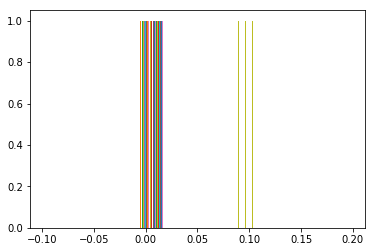

In [337]:
plt.hist(round_df(df_4205_pct_change))
plt.show

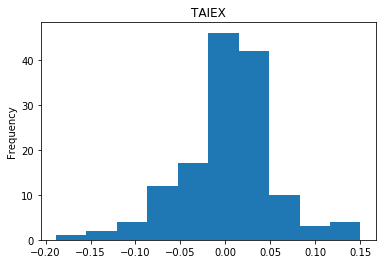

In [352]:
df_TAIEX_pct_change['Value'].plot(kind='hist',title="TAIEX")

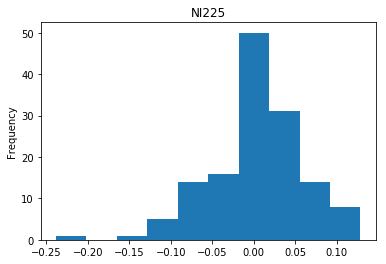

In [353]:
df_NI225_pct_change['Value'].plot(kind='hist',title="NI225")

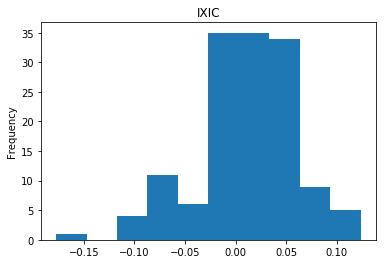

In [354]:
df_IXIC_pct_change['Value'].plot(kind='hist',title="IXIC")

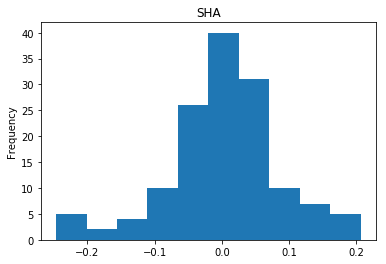

In [355]:
df_SHA_pct_change['Value'].plot(kind='hist',title="SHA")

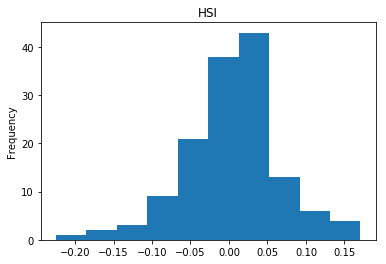

In [356]:
df_HSI_pct_change['Value'].plot(kind='hist',title="HSI")

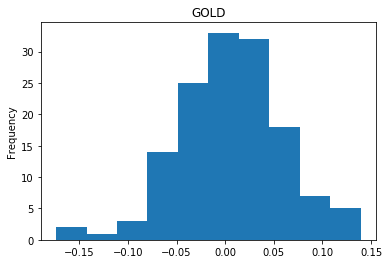

In [357]:
df_GOLD_pct_change['Value'].plot(kind='hist',title="GOLD")

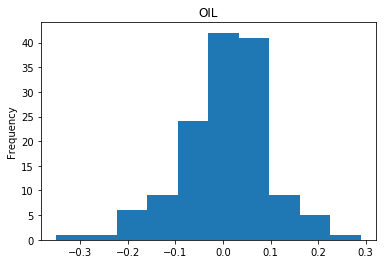

In [358]:
df_OIL_pct_change['Value'].plot(kind='hist',title="OIL")

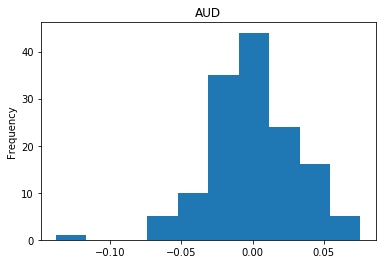

In [359]:
df_AUD_pct_change['Value'].plot(kind='hist',title="AUD")

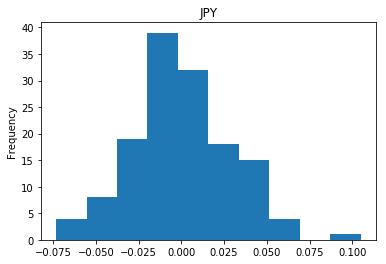

In [360]:
df_JPY_pct_change['Value'].plot(kind='hist',title="JPY")

In [117]:
df_10YUSAB_nrz = data_arrangement(df_10YUSAB)
df_AUD_nrz = data_arrangement(df_AUD)
df_FED_nrz = data_arrangement(df_FED)
df_SHA_nrz = data_arrangement(df_SHA)
df_HSI_nrz = data_arrangement(df_HSI)
df_IXIC_nrz = data_arrangement(df_IXIC)
df_JPY_nrz = data_arrangement(df_JPY)
df_NI225_nrz = data_arrangement(df_NI225)
df_OIL_nrz = data_arrangement(df_OIL)
df_POrate_nrz = data_arrangement(df_POrate)
df_TAIEX_nrz = data_arrangement(df_TAIEX)
df_USACPI_nrz = data_arrangement(df_USACPI)
df_USD_nrz = data_arrangement(df_USD)
df_GOLD_nrz = data_arrangement(df_GOLD)
df_2070_nrz = data_arrangement(df_2070)
df_2748_nrz = data_arrangement(df_2748)
df_2884_nrz = data_arrangement(df_2884)
df_2891_nrz = data_arrangement(df_2891)
df_4205_nrz = data_arrangement(df_4205)